# HANDWRITTEN DIGITS CLASSIFICATION USING NEURAL NETWORK

In [1]:
#Importing required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading handwritten digits dataset from keras library
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()        

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

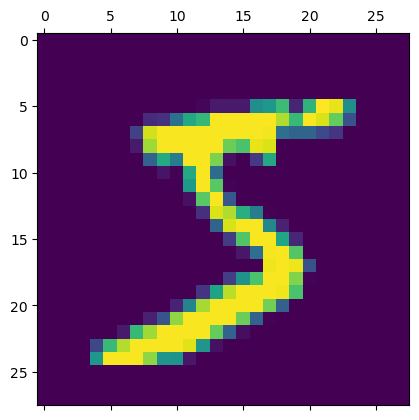

In [8]:
#Plotting first training image
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
#Scaling data
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [29]:
X_train.shape

(60000, 28, 28)

In [12]:
#Flattening the data i.e., converting two dimensional to one dimensional data
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Simple neural network with no hidden layers

In [15]:
#Building and training model
#input layer with 784 elements (28*28) and output layer with 10 elements(0-9)
model = keras.Sequential([                                                    #Sequential:stack of layers
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')          #input layer
])

model.compile(optimizer='adam',                                              
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)                              #Training model

Epoch 1/5
1875/1875 [==============================] - 2s 903us/step - loss: 0.4730 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 2s 811us/step - loss: 0.3040 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 808us/step - loss: 0.2839 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 817us/step - loss: 0.2734 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 2s 803us/step - loss: 0.2669 - accuracy: 0.9252


In [16]:
#Model Evaluation
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 749us/step - loss: 0.2668 - accuracy: 0.9272


[0.26677313446998596, 0.9272000193595886]

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 786us/step


array([2.45335456e-02, 4.38842449e-07, 4.12876271e-02, 9.54599559e-01,
       2.58251280e-03, 9.46459696e-02, 1.09012353e-06, 9.99836028e-01,
       1.11121945e-01, 6.31971359e-01], dtype=float32)

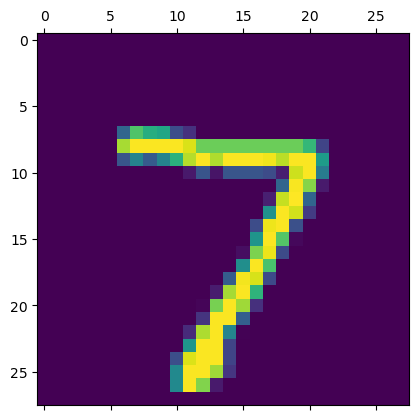

In [18]:
plt.matshow(X_test[0])

In [19]:
#np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[0])

7

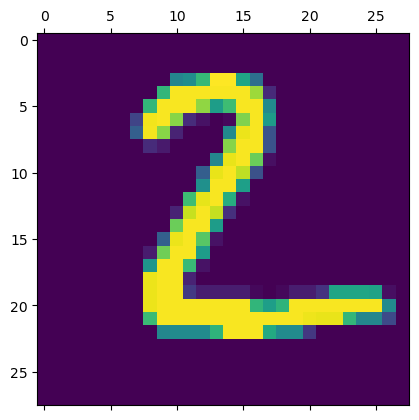

In [30]:
plt.matshow(X_test[1])

In [31]:
np.argmax(y_predicted[1])

2

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [34]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    1,    0,    5,    8,    4,    2,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,    9,  922,   15,    8,    5,   14,   12,   41,    2],
       [   4,    0,   17,  917,    0,   23,    3,   14,   26,    6],
       [   1,    1,    2,    1,  921,    0,   13,    5,   10,   28],
       [   8,    3,    2,   28,   12,  773,   21,    7,   32,    6],
       [   7,    3,    6,    1,    7,   12,  917,    2,    3,    0],
       [   1,    5,   21,    4,    6,    0,    0,  969,    4,   18],
       [   5,    9,    6,   17,    8,   20,   11,   13,  881,    4],
       [  11,    7,    1,    9,   31,    7,    0,   35,    9,  899]])>

Text(95.72222222222221, 0.5, 'Truth')

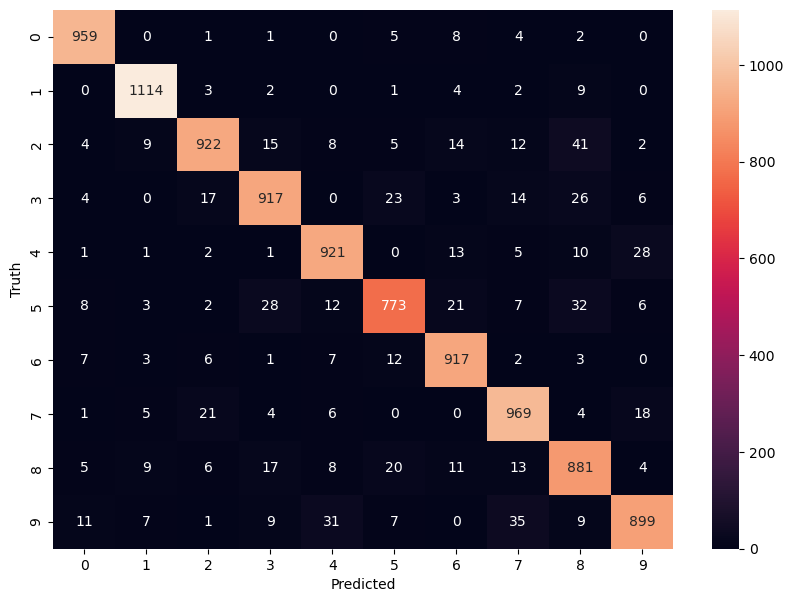

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer

In [24]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),         #Hidden layer
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2765 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1263 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0876 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0672 - accuracy: 0.9788
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0527 - accuracy: 0.9841


In [25]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 917us/step - loss: 0.0767 - accuracy: 0.9766


[0.07673957943916321, 0.9765999913215637]

313/313 [==============================] - 0s 833us/step


Text(95.72222222222221, 0.5, 'Truth')

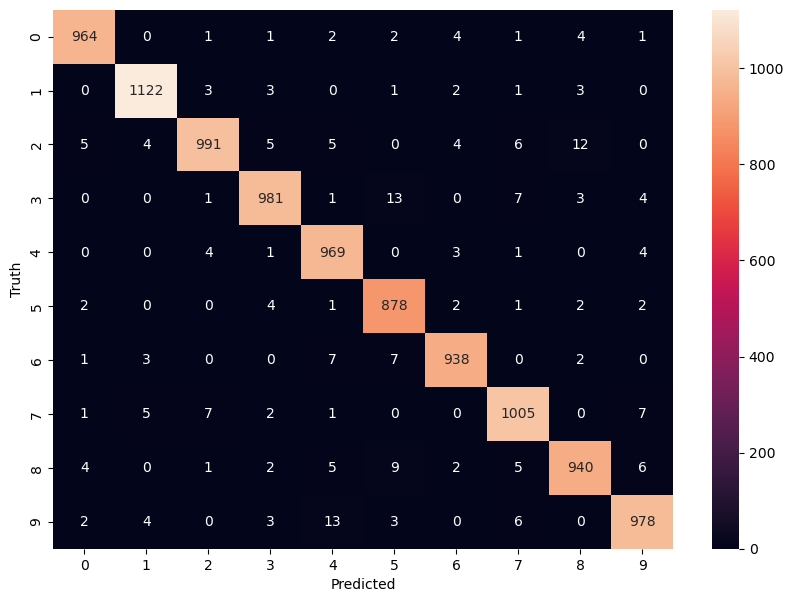

In [26]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),                     #Flattens data
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2719 - accuracy: 0.9228
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1236 - accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0870 - accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0656 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0525 - accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0427 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0338 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0277 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0238 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 952us/step - loss: 0.0852 - accuracy: 0.9765


[0.08515017479658127, 0.9764999747276306]